### Classifying individuals into two Income brackets

<b>Hypothesis generation:</b>

Let’s think of some hypothesis which can influence the outcome:

H0 : There is no significant impact of the variables (below) on the dependent variable.

H1 : There exists a significant impact of the variables (below) on the dependent variable.

<b>Importing necessary libraries and data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import minmax_scale
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [4]:
print(data.shape)

(199523, 41)


A lot of the data points are redundant, we do not want that in our model

In [5]:
data.drop_duplicates(inplace=True)
data.shape

(152896, 41)

Test data has no missing values!

In [6]:
data['income_level'].value_counts()

-50000    140529
 50000     12367
Name: income_level, dtype: int64

In [10]:
data.income_level = data.income_level.replace({-50000:0, 50000:1})

In [11]:
data.columns = ['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year','Above_50k']

In [12]:
data['Above_50k'].value_counts()

0    140529
1     12367
Name: Above_50k, dtype: int64

<b>Checking imbalance:

Imbalance in data as the majority of people have their income below 50k (dollars)

In [13]:
print('Train data balance :')
print(data.Above_50k.value_counts()/len(data))

Train data balance :
0    0.919115
1    0.080885
Name: Above_50k, dtype: float64


### DATA ANALYSIS

In [14]:
def get_summary(df):
    
    for i in df.columns[1:]:

        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print(i)
            print('Maximum :',df[i].max())
            print('Minimum :', df[i].min())
            print('Mean :',df[i].mean())
            print('Median :',df[i].median())
            print('Mode :',df[i].mode()[0])
            print('\n')

        else:
            print(i)
            print(df[i].value_counts())
            print('\n')
            
get_summary(data)

class_of_worker
Private                           71738
Not in universe                   54165
Self-employed-not incorporated     8321
Local government                   7726
State government                   4221
Self-employed-incorporated         3259
Federal government                 2920
Never worked                        383
Without pay                         163
Name: class_of_worker, dtype: int64


industry_code
Maximum : 51
Minimum : 0
Mean : 19.94292198618669
Median : 24.0
Mode : 0


occupation_code
Maximum : 46
Minimum : 0
Mean : 14.67287568020092
Median : 10.0
Mode : 0


education
High school graduate                      43642
Some college but no degree                26329
Bachelors degree(BA AB BS)                19391
Children                                  12710
10th grade                                 6487
Masters degree(MA MS MEng MEd MSW MBA)     6460
7th and 8th grade                          6309
11th grade                                 6213
Associates d

Name: migration_sunbelt, dtype: int64


num_person_Worked_employer
Maximum : 6
Minimum : 0
Mean : 2.538052009208874
Median : 2.0
Mode : 0


family_members_under_18
Not in universe           134959
Both parents present       10863
Mother only present         5137
Father only present         1028
Neither parent present       909
Name: family_members_under_18, dtype: int64


country_father
United-States                   115471
Mexico                            8120
Puerto-Rico                       2560
Italy                             2150
Canada                            1354
Germany                           1305
Dominican-Republic                1245
Poland                            1192
Cuba                              1089
Philippines                       1067
El-Salvador                        942
China                              829
England                            780
Columbia                           601
India                              549
South Korea              

In columns like <b>member_of_labor_union, reason_for_unemployment, region_of_previous_residence, state_of_previous_residence, migration_within_reg, migration_reg, migration_msa, migration_sunbelt, family_members_under_18, fill_questionnaire_veteran_admin </b> have a category called 'Not in universe'. We will assume that people were frustrated enough to give a sarcastic response. We will treat that as a separate category in some cases and clean in some because that could inhibit some kind of behavioural pattern

<b>Separating categorical and numeric variables for further analysis:

In [15]:
num_cols = data.loc[:,data.select_dtypes(['float64','int64']).columns[:-1]].columns.tolist()

In [16]:
cat_cols = data.loc[:,data.select_dtypes(['O']).columns].columns.tolist()

<b>Numeric data analysis

In [17]:
num_cols.remove('business_or_self_employed')
num_cols.remove('veterans_benefits')

In [18]:
cat_cols.extend(['veterans_benefits','business_or_self_employed','num_person_Worked_employer'])

C:\Users\nayak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\nayak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nayak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\nayak\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


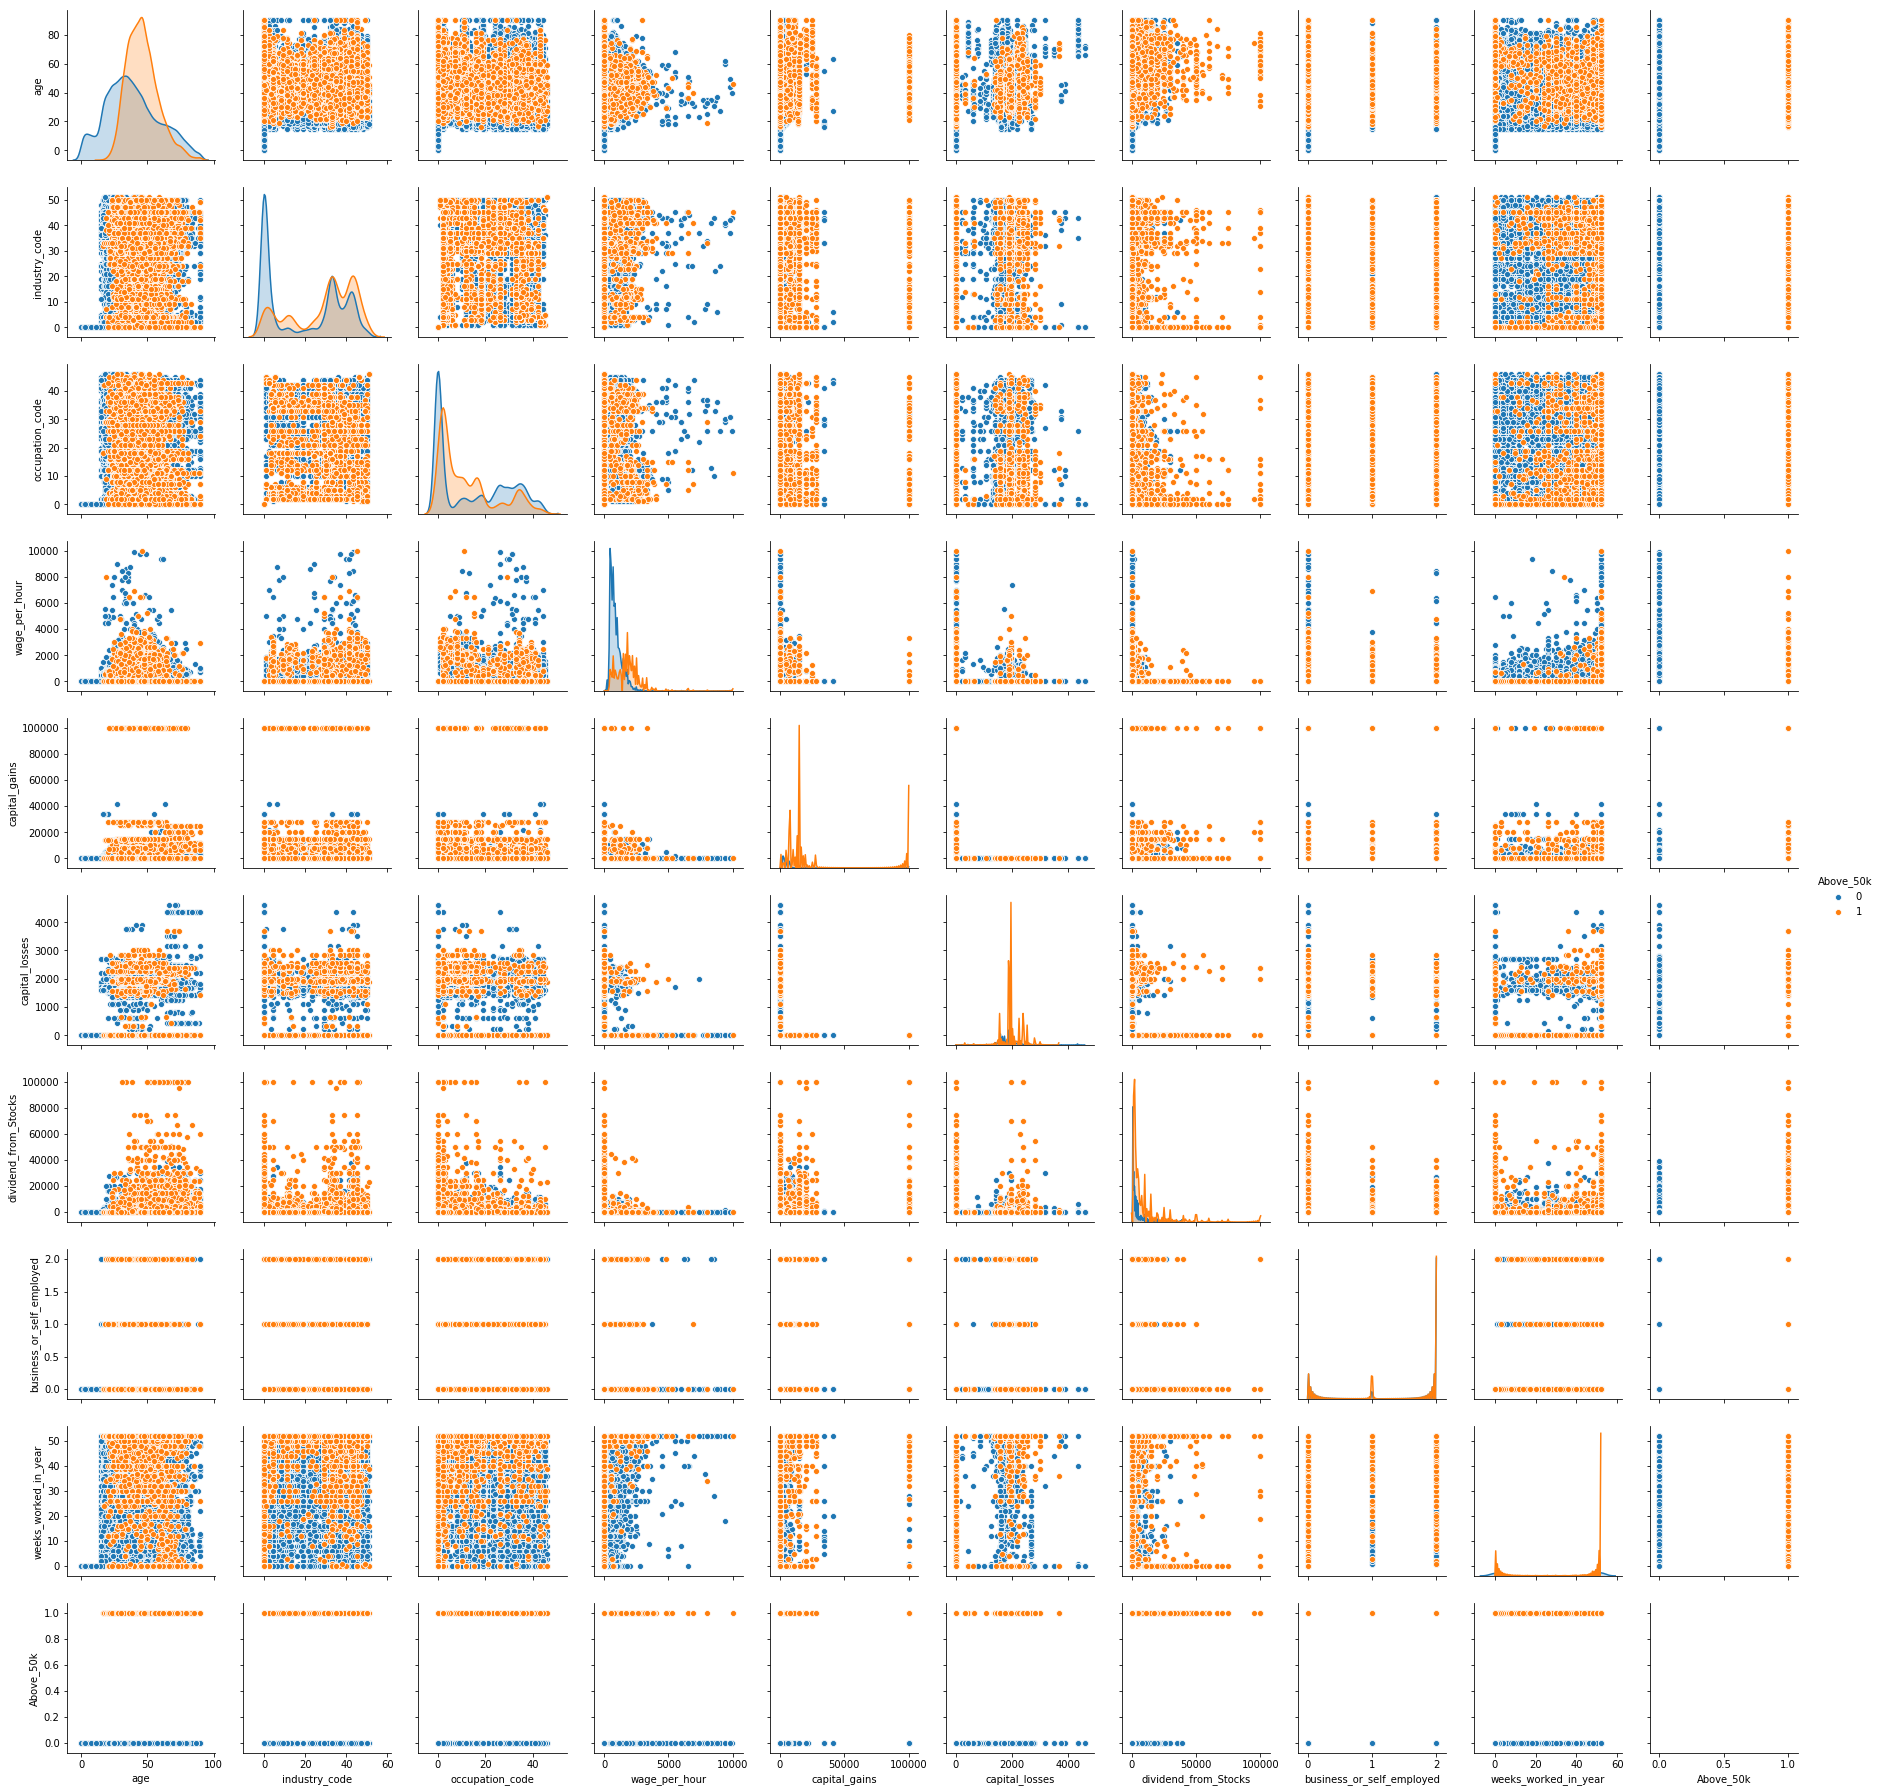

In [19]:
sns.pairplot(data.drop(columns=['veterans_benefits','year','num_person_Worked_employer']), hue='Above_50k')

We can see that people of age approx. 0-90 are present in the data set, people from age 0-20 will mostly have income below 50k

Which is true here, people from childhood to the end of teenage can rarely be earning above 50k

In [20]:
data[data.loc[:,'age']<20].loc[:,'Above_50k'].value_counts()

0    22988
1        8
Name: Above_50k, dtype: int64

This data is pretty skewed towards people who have not made any losses, let us check their relation with income

Must of them seem to earn less than 50k which could mean that people take bigger risks when their income increases and can suffer from losses, people with income less than 50k can be risk-averse.

In [21]:
data[data.loc[:,'capital_losses'] == 0].loc[:,'Above_50k'].value_counts()

0    137793
1     11198
Name: Above_50k, dtype: int64

Age vs Wage/hour:

A lot of people that earn less than 50k have wage/hr between 0 and 3000 and are aged between 20-70 and it also shows that before 20 years and after 8 years very few people have wage/hr > 0

Wage/hr vs Weeks worked/year

Thos who have worked less weeks in a year obviously will get less compensation which is what is indicated in this plot. Those who have worked more than 30 weeks per year seem to be earning more than 50k 

<b>Categorical data analysis

Checking whether the choice of education affects salary

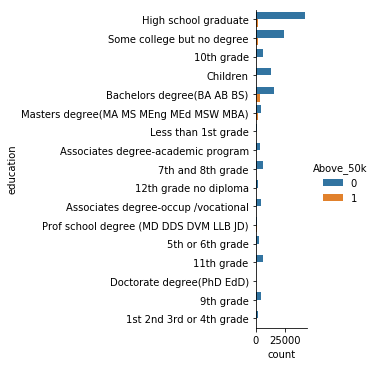

In [22]:
sns.catplot(y='education',kind='count', hue="Above_50k", data=data)

People with a masters and bachelor's degree seem to be in the brackets of Above 50k

In [23]:
data[data.education == 'Doctorate degree(PhD EdD)'].shape[0]/len(data)

0.008253976559229803

Since we have only 0.8% of the individuals with a doctorate in the data it is possible that they're not visible in the bar charts

In [24]:
data[data.education == 'Doctorate degree(PhD EdD)']['Above_50k'].value_counts()

1    657
0    605
Name: Above_50k, dtype: int64

Although half of the people with a Doctorate degree are earning below 50k

Education vs gender?

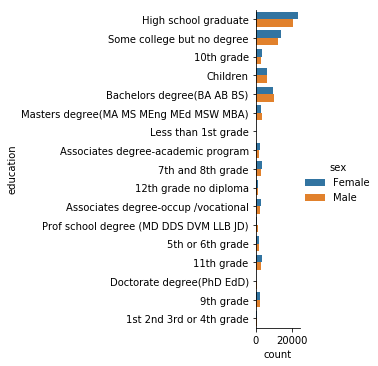

In [25]:
sns.catplot(y='education',kind='count', hue="sex", data=data)
sns.set_palette(sns.color_palette())

A slightly higher percentage of females seems to have completed education than males.

Gender vs pay?

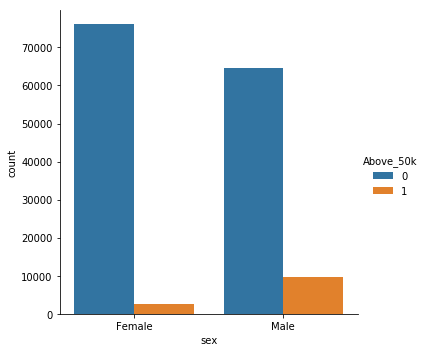

In [26]:
sns.catplot(x='sex',kind='count', hue="Above_50k", data=data)

Despite the fact that women seem to be more educated that men, their salary structure looks bad on this data set. There are more women who earn less than 50k and there are less women who earn less than 50k compared to men

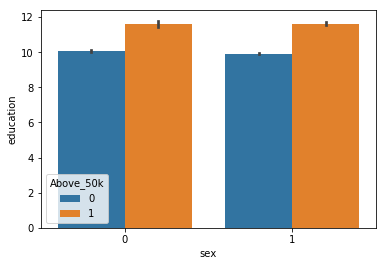

In [27]:
from sklearn.preprocessing import LabelEncoder

sns.barplot(x='sex', y='education', hue='Above_50k', data=data.dropna().apply(LabelEncoder().fit_transform))

It shows that both males and females with equal education fall in the same income bracket!

<b>Data Cleaning and Manipulation

In [28]:
data.loc[:,num_cols].isna().sum().any()

False

Numerical values have no missing values,only categorical values are missing!

In [29]:
data.loc[:,cat_cols].isna().sum()

class_of_worker                         0
education                               0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       848
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           698
d_household_family_stat                 0
d_household_summary                     0
migration_msa                       74944
migration_reg                       74944
migration_within_reg                74944
live_1_year_ago                         0
migration_sunbelt                   74944
family_members_under_18                 0
country_father                    

Values with less than 5% values in the data can be binned into a separate category as too many unimportant categories will anyway increase the number of dimensions in the problem.

In [30]:
for i in data.loc[:,cat_cols].columns:
    print(i)
    print(data[i].value_counts()/len(data))
    print('\n')

class_of_worker
Private                           0.469195
Not in universe                   0.354260
Self-employed-not incorporated    0.054423
Local government                  0.050531
State government                  0.027607
Self-employed-incorporated        0.021315
Federal government                0.019098
Never worked                      0.002505
Without pay                       0.001066
Name: class_of_worker, dtype: float64


education
High school graduate                      0.285436
Some college but no degree                0.172202
Bachelors degree(BA AB BS)                0.126825
Children                                  0.083128
10th grade                                0.042428
Masters degree(MA MS MEng MEd MSW MBA)    0.042251
7th and 8th grade                         0.041263
11th grade                                0.040635
Associates degree-occup /vocational       0.034331
9th grade                                 0.032545
Associates degree-academic program   

United-States                   0.762721
Mexico                          0.052277
Puerto-Rico                     0.015553
Italy                           0.011681
Canada                          0.009372
Germany                         0.008712
Philippines                     0.007436
Poland                          0.007149
Cuba                            0.007051
Dominican-Republic              0.006952
El-Salvador                     0.006933
England                         0.005827
China                           0.004801
Columbia                        0.003911
Ireland                         0.003898
South Korea                     0.003807
India                           0.003604
Japan                           0.002982
Vietnam                         0.002937
Jamaica                         0.002891
Guatemala                       0.002845
Ecuador                         0.002407
Peru                            0.002322
Haiti                           0.002263
Portugal        

Combining categories:

In [31]:
data.columns

Index(['age', 'class_of_worker', 'industry_code', 'occupation_code',
       'education', 'wage_per_hour', 'enrolled_in_edu_inst_lastwk',
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'member_of_labor_union',
       'reason_for_unemployment', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses', 'dividend_from_Stocks',
       'tax_filer_status', 'region_of_previous_residence',
       'state_of_previous_residence', 'd_household_family_stat',
       'd_household_summary', 'migration_msa', 'migration_reg',
       'migration_within_reg', 'live_1_year_ago', 'migration_sunbelt',
       'num_person_Worked_employer', 'family_members_under_18',
       'country_father', 'country_mother', 'country_self', 'citizenship',
       'business_or_self_employed', 'fill_questionnaire_veteran_admin',
       'veterans_benefits', 'weeks_worked_in_year', 'year', 'Above_50k'],
      dtype='object')

In [32]:
series = pd.value_counts(data.loc[:,cat_cols].columns)
mask = (series/series.sum() * 100).lt(5)

for i in data.loc[:,cat_cols]:
    data.loc[:,i] = np.where(data.loc[:,i].isin(series[mask].index),'Other',data.loc[:,i])

Dropping variables with too many missing values:

In [33]:
def remove_vars_with_many_nas(df):
    
    nas = df.isnull().sum()/len(df) > 0.4
    
    drop_cols = nas[nas==True].index.tolist()
    
    df.drop(columns=drop_cols, inplace=True)
    
remove_vars_with_many_nas(data)

Cannot use codes for analysis:

In [34]:
data.drop(columns=['industry_code','occupation_code'],inplace=True)

data.drop(columns=['major_industry_code','major_occupation_code'],inplace=True)

Imputing missing values with the mode for categorical columns:

In [35]:
def impute_nas(df):
    
    remaining_nas = df.isna().sum() > 0
    
    remaining_nas = remaining_nas[remaining_nas == True].index.tolist()
    
    for i in remaining_nas:
            
        df.loc[df[i].isnull(),i] = df[i].mode()[0]
            

    if df.isna().sum().any() == False:
        
        print('Done!')    
        
impute_nas(data)

Done!


Checking for multicollinearity:

In [38]:
def show_unimp_vars(df,max_corr):

    dfq = df.corr()

    corr = []

    for ind,row in dfq.iterrows():
        for i in row.index.tolist():
            if ind != i and abs(row[i]) > max_corr:
                if (i,ind) in corr:
                    continue
                else:
                    corr.append((ind,i))
    
    return corr


corr_list = show_unimp_vars(data.loc[:,num_cols], max_corr = 0.6)
corr_list

[]

In [39]:
data.shape

(152896, 33)

'Not in universe' category in some columns needs to be substituted by a new category because it doesn't make sense in those columns

In [54]:
sarcasm = ['member_of_labor_union','region_of_previous_residence',' state_of_previous_residence', 'migration_within_reg', 'migration_reg', 'migration_msa', 'migration_sunbelt', 'family_members_under_18', 'fill_questionnaire_veteran_admin']

for i in data.columns:
    
    if i in sarcasm:
        
        data[i].replace({'Not in universe': 'Unknown'}, inplace=True)

        print(data[i].unique())

['No' 'Yes']
['South' 'Northeast' 'Midwest' 'West' 'Abroad']
['Both parents present' 'Mother only present' 'Neither parent present'
 'Father only present']
['No' 'Yes']


Categorizing the variables that have a lot of zeros

Age:

In [69]:
print(data.age.max())

data.age = pd.cut(data.age, 3)

Wage per hour

In [77]:
print(data.wage_per_hour.max())

data.wage_per_hour = pd.cut(data.wage_per_hour,5)

Capital gains:

In [81]:
print(data.capital_gains.max())

data.capital_gains = pd.cut(data.capital_gains,5)

Capital losses:

In [82]:
print(data.capital_losses.max())

data.capital_losses = pd.cut(data.capital_losses,5)

4608


Dividend from stocks:

In [84]:
print(data.dividend_from_Stocks.max())

data.dividend_from_Stocks = pd.cut(data.dividend_from_Stocks,10)

99999


### Approaching Model Building

Undersampling the majority class:

In [123]:
undersample = pd.concat([data[data.Above_50k == 0].sample(20000), data[data.Above_50k == 1]],axis=0)
undersample.shape

X_und = pd.get_dummies(undersample[undersample.columns.difference(['Above_50k'])])
y_und = undersample['Above_50k']

SMOTE (Synthetic Minority Oversampling Technique)

In [101]:
from imblearn.over_sampling import SMOTE

X = pd.get_dummies(data[data.columns.difference(['Above_50k'])])
y = data['Above_50k']

In [114]:
sm = SMOTE(sampling_strategy = 'minority', k_neighbors = 5, random_state=123)
X_res, y_res = sm.fit_sample(X,y)

print(X_res.shape)
print(y_res.shape)

(281058, 373)
(281058,)


<b>Model:

Since we have a high dimensional dataset, we will not go for plain LogisticRegression, we will use Lasso penalty on this

<b>Without over/under sampling:

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

LR = LogisticRegressionCV(penalty='l1',solver='liblinear', random_state=123).fit(X_train, y_train)

y_tr_pred = LR.predict(X_train)

y_ts_pred = LR.predict(X_test)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [119]:
print(accuracy_score(y_train, y_tr_pred))
print('\n')
print(accuracy_score(y_test, y_ts_pred))
print('\n')
print(classification_report(y_train, y_tr_pred))
print('\n')
print(classification_report(y_test, y_ts_pred))

0.9373802872172442


0.9343565370947698


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     98455
           1       0.73      0.35      0.47      8572

   micro avg       0.94      0.94      0.94    107027
   macro avg       0.84      0.67      0.72    107027
weighted avg       0.93      0.94      0.93    107027



              precision    recall  f1-score   support

           0       0.94      0.99      0.97     42074
           1       0.71      0.35      0.47      3795

   micro avg       0.93      0.93      0.93     45869
   macro avg       0.83      0.67      0.72     45869
weighted avg       0.92      0.93      0.92     45869



As expected, the model performs very badly on the original data set, specifically on the minority class!

<b>Undersampled data:

In [124]:
X_u_train, X_u_test, y_u_train, y_u_test = train_test_split(X_und, y_und, test_size=0.3, random_state=123)

LR_u = LogisticRegressionCV(penalty='l1',solver='liblinear', random_state=123).fit(X_u_train, y_u_train)

y_tr_u = LR_u.predict(X_u_train)

y_ts_u = LR_u.predict(X_u_test)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [125]:
print(accuracy_score(y_u_train, y_tr_u))
print('\n')
print(accuracy_score(y_u_test, y_ts_u))
print('\n')
print(classification_report(y_u_train, y_tr_u))
print('\n')
print(classification_report(y_u_test, y_ts_u))

0.8392920197740112


0.8427556379363609


              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14012
           1       0.80      0.77      0.79      8644

   micro avg       0.84      0.84      0.84     22656
   macro avg       0.83      0.83      0.83     22656
weighted avg       0.84      0.84      0.84     22656



              precision    recall  f1-score   support

           0       0.87      0.88      0.87      5988
           1       0.80      0.79      0.79      3723

   micro avg       0.84      0.84      0.84      9711
   macro avg       0.83      0.83      0.83      9711
weighted avg       0.84      0.84      0.84      9711



So much better than before! Undersampling might have caused a significant loss in information but the model currently performs so much better than before, both on training and test set.

<b>SMOTE

In [133]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_res, y_res, test_size=0.3, random_state=123)

LR_sm = RidgeClassifierCV(alphas=np.repeat(0.1,5),cv=5).fit(X_sm_train, y_sm_train)

y_tr_sm = LR_sm.predict(X_sm_train)

y_ts_sm = LR_sm.predict(X_sm_test)

In [134]:
print(accuracy_score(y_sm_train, y_tr_sm))
print('\n')
print(accuracy_score(y_sm_test, y_ts_sm))
print('\n')
print(classification_report(y_sm_train, y_tr_sm))
print('\n')
print(classification_report(y_sm_test, y_ts_sm))

0.9187048897021449


0.919222467326075


              precision    recall  f1-score   support

           0       0.93      0.90      0.92     98370
           1       0.91      0.93      0.92     98370

   micro avg       0.92      0.92      0.92    196740
   macro avg       0.92      0.92      0.92    196740
weighted avg       0.92      0.92      0.92    196740



              precision    recall  f1-score   support

           0       0.93      0.91      0.92     42159
           1       0.91      0.93      0.92     42159

   micro avg       0.92      0.92      0.92     84318
   macro avg       0.92      0.92      0.92     84318
weighted avg       0.92      0.92      0.92     84318



We can conclude that Ridge Regression along with SMOTE works the best for this problem.<BR>
A Precision, Recall and F1-score of 0.92 was achieved on this dataset.

<b>FIN